In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import geopandas as gpd
import numpy as np
import os
import scipy as sc
import requests
import datetime
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)

In [3]:
file_final = pd.read_csv('../traffic/file_final.csv', parse_dates=['DATETIME'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M'))

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


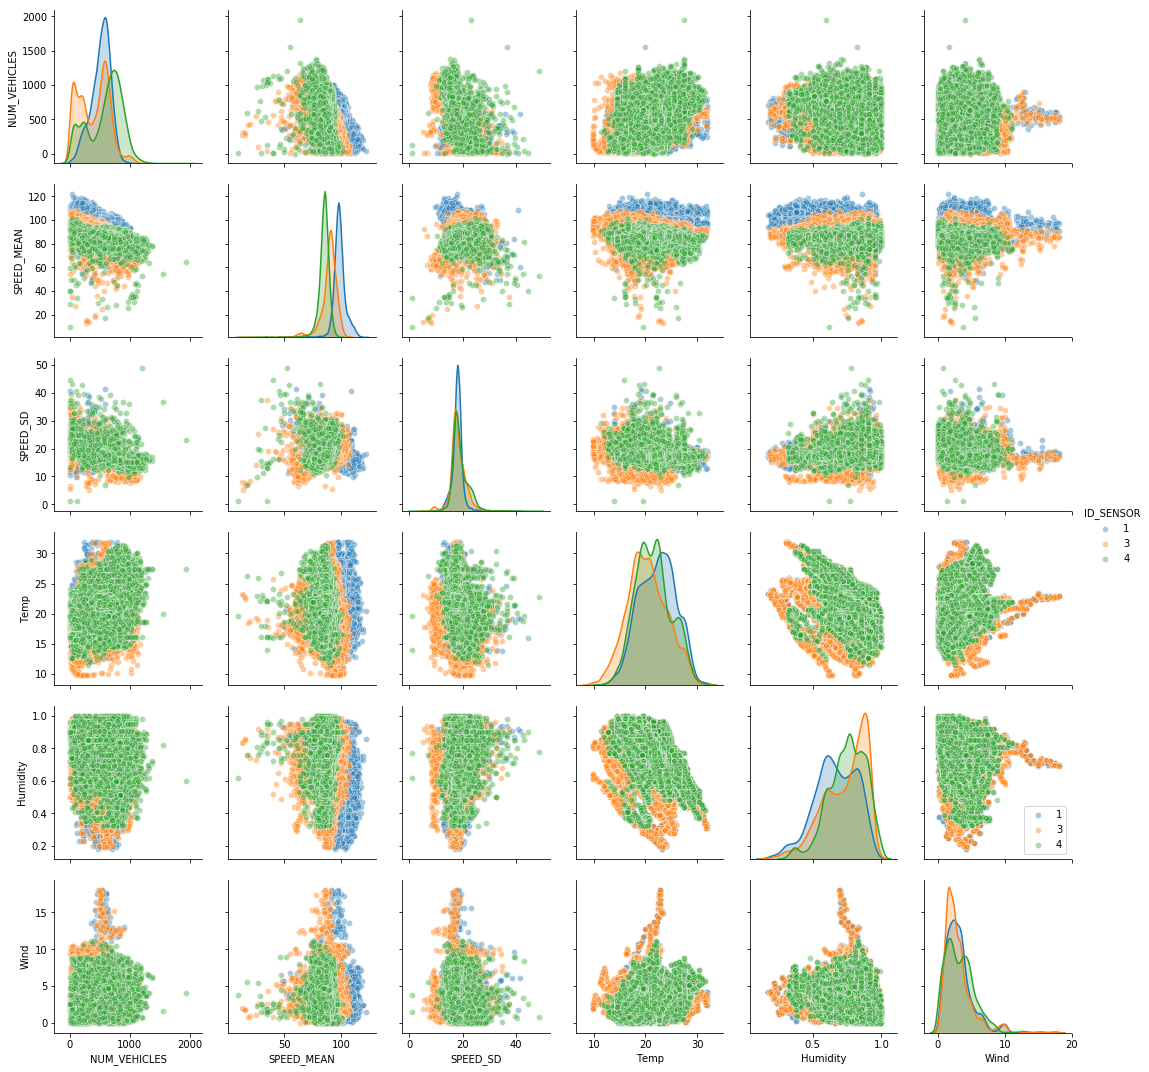

In [4]:
sns.pairplot(data = file_final, vars = ['NUM_VEHICLES', 'SPEED_MEAN', 'SPEED_SD', 'Temp', 'Humidity', 'Wind'], hue = 'ID_SENSOR', plot_kws={'alpha': 0.4})
plt.legend()

/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


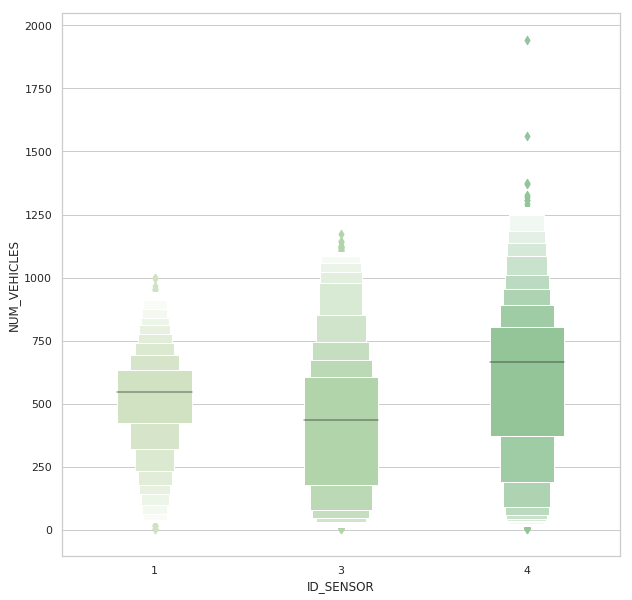

In [5]:
plt.figure(figsize=(2^8,2^8), frameon=False)
sns.set(style="whitegrid")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Verdana'

sns.plotting_context('poster')
sns.boxenplot(data = file_final, x = 'ID_SENSOR', y='NUM_VEHICLES', palette=pal, saturation=1, width = 0.4, scale='area')

/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


KeyboardInterrupt: 

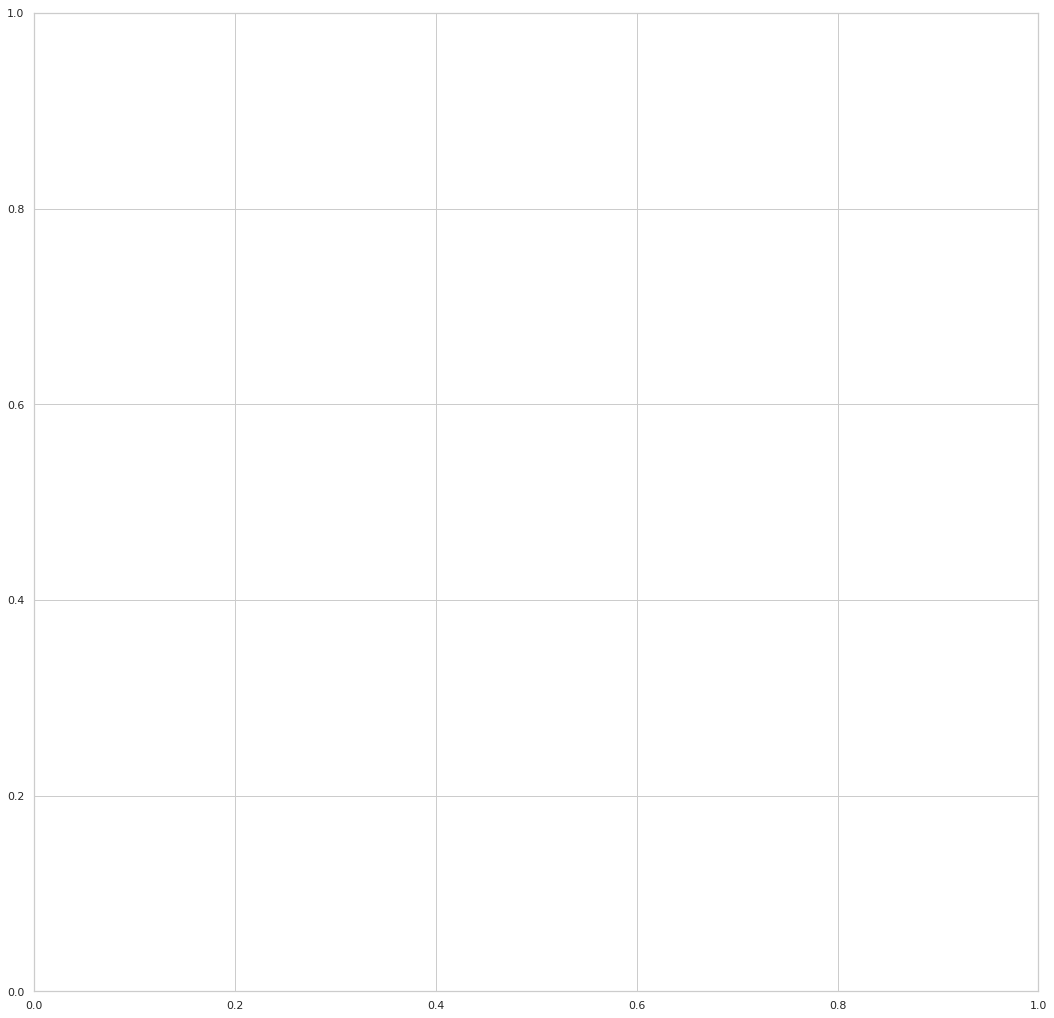

In [11]:
plt.figure(figsize=(2^16,2^16))
#histogram = file_final.drop(['ID_SENSOR', 'DIRECTION','DATETIME','EVENT', 'LON', 'LAT'], axis=1).hist(bins=25 )
plt.hist(file_final.drop(['ID_SENSOR', 'DIRECTION','DATETIME','EVENT', 'LON', 'LAT'], axis=1), bins=25)
plt.show()

/usr/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


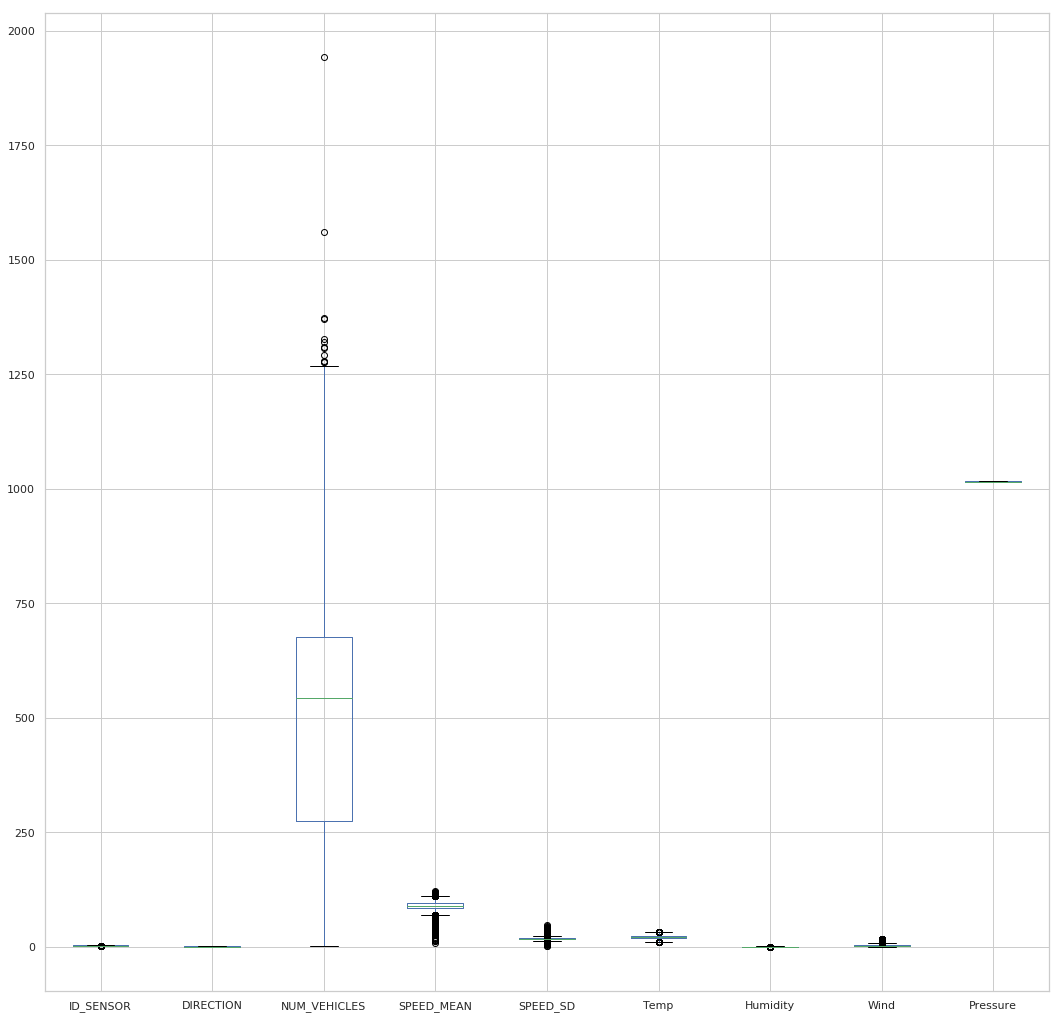

In [12]:
figure = plt.figure(figsize=(2^16, 2^16))
rows1=file_final[['ID_SENSOR', 'DIRECTION', 'NUM_VEHICLES', 'SPEED_MEAN','SPEED_SD', 'Temp', 'Humidity', 'Wind', 'Pressure']]
y_raw = rows1['SPEED_MEAN']
x_raw = rows1.drop(['SPEED_MEAN'], axis=1)
rows1.boxplot()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


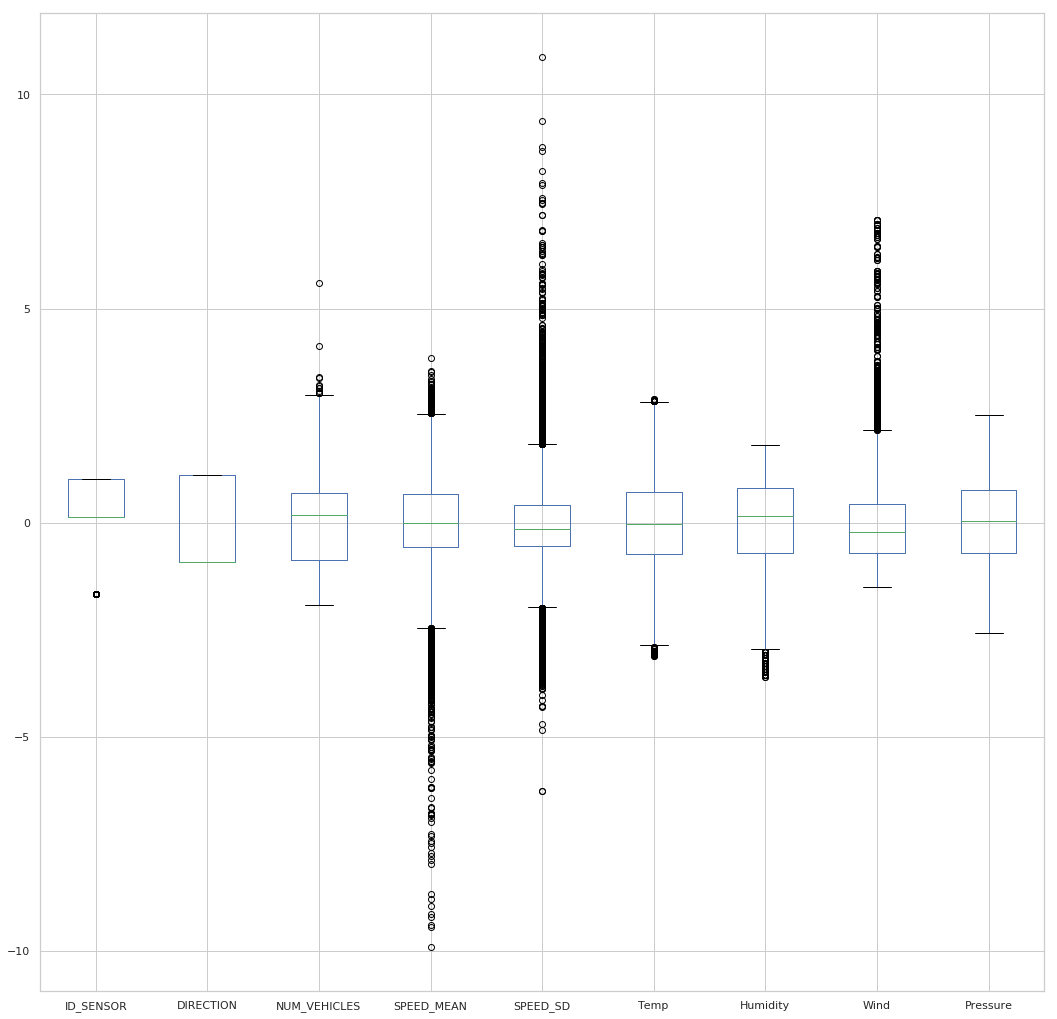

In [13]:
for c in rows1.columns:
    if (c!='label' and c!='filename'):
        rows1[c] = (rows1[c]-np.mean(rows1[c]))/np.std(rows1[c])
figure = plt.figure(figsize=(2^16, 2^16))
rows1.boxplot()
  